In [17]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('C:/Users/gusta/Downloads/Student-Mental-health.csv')


In [24]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('C:/Users/gusta/Downloads/Student-Mental-health.csv')

# Cálculos
idade_media = df['Age'].mean()
mediana_idade = df['Age'].median()
desvio_padrao = df['Age'].std()

# Resultados
resultado = {
    'Idade Média': idade_media,
    'Mediana da Idade': mediana_idade,
    'Desvio Padrão': desvio_padrao
}

# Exibir resultados
resultado


{'Idade Média': np.float64(20.326732673267326),
 'Mediana da Idade': np.float64(19.0),
 'Desvio Padrão': np.float64(3.2159257170870386)}

In [22]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('C:/Users/gusta/Downloads/Student-Mental-health.csv')

# Agrupar e calcular porcentagens
results = df.groupby('Choose your gender').agg( 
    Depression=('Do you have Depression?', lambda x: (x == 'Yes').mean() * 100),
    Anxiety=('Do you have Anxiety?', lambda x: (x == 'Yes').mean() * 100),
    Panic_Attack=('Do you have Panic attack?', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

# Selecionar apenas as colunas relevantes
percentages = results[['Choose your gender', 'Depression', 'Anxiety', 'Panic_Attack']]
print(percentages)


  Choose your gender  Depression    Anxiety  Panic_Attack
0             Female   38.666667  32.000000     33.333333
1               Male   23.076923  38.461538     30.769231


Timestamp                                       object
Choose your gender                              object
Age                                              int64
What is your course?                            object
Your current year of Study                      object
What is your CGPA?                              object
Marital status                                  object
Do you have Depression?                         object
Do you have Anxiety?                            object
Do you have Panic attack?                       object
Did you seek any specialist for a treatment?    object
Depression                                       int64
Anxiety                                          int64
Panic Attack                                     int64
dtype: object
   Your current year of Study Choose your gender  Depression     Anxiety  \
0                      Year 1             Female    0.000000    0.000000   
1                      Year 1               Male  100.000000  10

C:\Users\gusta\AppData\Local\Temp\ipykernel_8652\1287874779.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['Your current year of Study', 'Choose your gender']).agg(


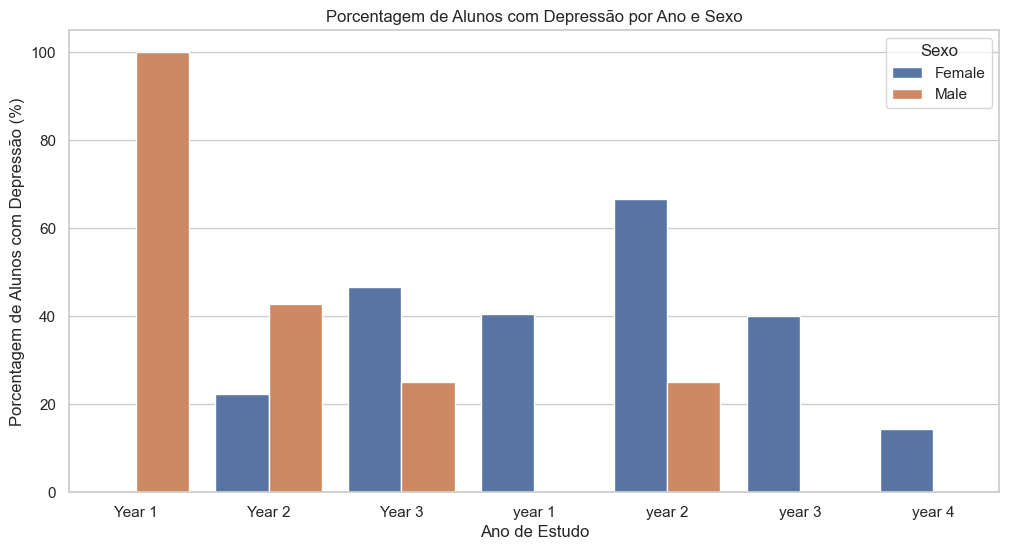

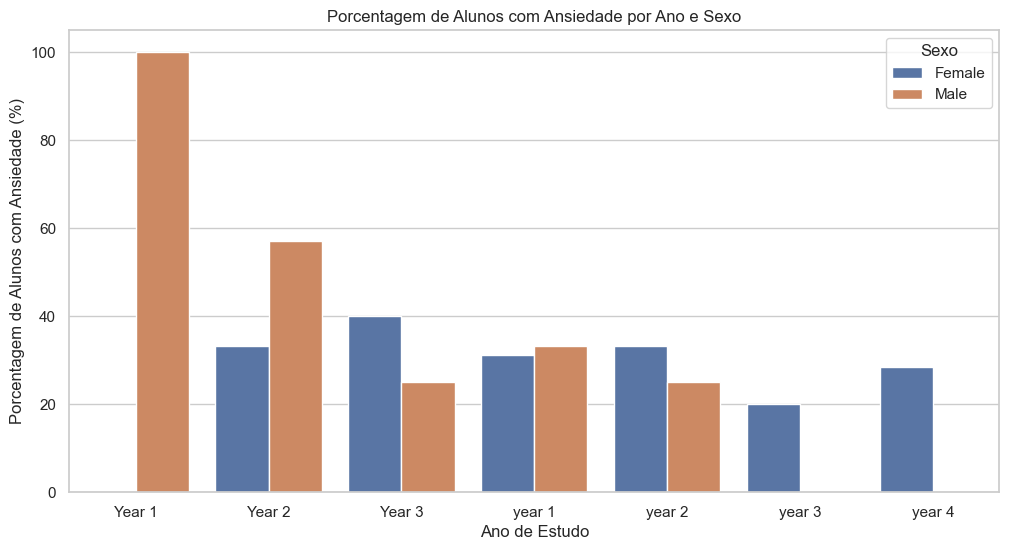

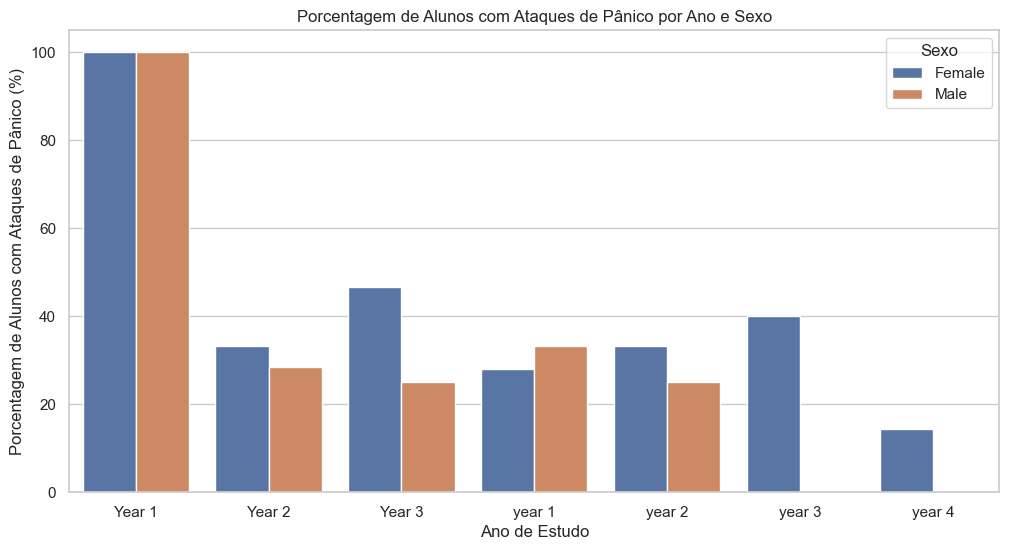

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('C:/Users/gusta/Downloads/Student-Mental-health.csv')

# Verificar os tipos de dados
print(df.dtypes)

# Preparar dados
df['Your current year of Study'] = df['Your current year of Study'].astype('category')
df['Choose your gender'] = df['Choose your gender'].astype('category')

# Criar tabela resumo
summary = df.groupby(['Your current year of Study', 'Choose your gender']).agg(
    Depression=('Do you have Depression?', lambda x: (x == 'Yes').mean() * 100),
    Anxiety=('Do you have Anxiety?', lambda x: (x == 'Yes').mean() * 100),
    Panic_Attack=('Do you have Panic attack?', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

print(summary)

# Gráficos
sns.set(style='whitegrid')

# Gráfico de barras para Depressão
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Your current year of Study', y='Depression', hue='Choose your gender')
plt.title('Porcentagem de Alunos com Depressão por Ano e Sexo')
plt.ylabel('Porcentagem de Alunos com Depressão (%)')
plt.xlabel('Ano de Estudo')
plt.legend(title='Sexo')
plt.show()

# Gráfico de barras para Ansiedade
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Your current year of Study', y='Anxiety', hue='Choose your gender')
plt.title('Porcentagem de Alunos com Ansiedade por Ano e Sexo')
plt.ylabel('Porcentagem de Alunos com Ansiedade (%)')
plt.xlabel('Ano de Estudo')
plt.legend(title='Sexo')
plt.show()

# Gráfico de barras para Ataques de Pânico
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Your current year of Study', y='Panic_Attack', hue='Choose your gender')
plt.title('Porcentagem de Alunos com Ataques de Pânico por Ano e Sexo')
plt.ylabel('Porcentagem de Alunos com Ataques de Pânico (%)')
plt.xlabel('Ano de Estudo')
plt.legend(title='Sexo')
plt.show()


In [25]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('C:/Users/gusta/Downloads/Student-Mental-health.csv')

# Converter as colunas de interesse de "Sim"/"Não" para 1/0
df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic_Attack'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Calcular correlações
correlacoes = df[['Depression', 'Anxiety', 'Panic_Attack', 'Age']].corr()

# Extrair as correlações específicas
resultados_correlacao = {
    'Ansiedade e Depressão': correlacoes.loc['Anxiety', 'Depression'],
    'Ansiedade e Ataque de Pânico': correlacoes.loc['Anxiety', 'Panic_Attack'],
    'Idade e Ansiedade': correlacoes.loc['Age', 'Anxiety'],
    'Idade e Depressão': correlacoes.loc['Age', 'Depression'],
    'Idade e Ataque de Pânico': correlacoes.loc['Age', 'Panic_Attack'],
}

# Exibir resultados
resultados_correlacao


{'Ansiedade e Depressão': np.float64(0.2737642875381253),
 'Ansiedade e Ataque de Pânico': np.float64(0.08447828353133642),
 'Idade e Ansiedade': np.float64(-0.026903237234722124),
 'Idade e Depressão': np.float64(-0.009334591491669143),
 'Idade e Ataque de Pânico': np.float64(0.08719732134751014)}